# GD with stochastic approach - Exercise $5$

Create a dataset with three classes, each class has N objects, represented by two variables X1 and X2 according to the following requirements:

+ N is equal to 500
+ X1 is distributed:
    1. for class 1, a normal distribution with mean -1 and standard deviation 0.5
    2. for class 2, a normal distribution with mean 2.5 and standard deviation 1
    3. for class 3, a normal distribution with mean 4 and standard deviation 1
+ X2 is distributed:
    1. for class 1, an exponential distribution with scale parameter 3
    2. for class 2, a lognormal distribution with mean 0.5 and standard deviation 0.5
    3. for class 3, a Poisson distribution with lambda 2.0 plus a constant equal to 5

Each object has a label y attached (1, 2, or 3).

In [21]:
import numpy as np

np.random.seed(540)
N = 500

# feature 1
X1_1 = np.random.normal(loc=-1, scale=0.5, size=N)
X1_2 = np.random.normal(loc=2.5, scale=1, size=N)
X1_3 = np.random.normal(loc=4, scale=1, size=N)

# feature 2
X2_1 = np.random.exponential(scale=3, size=N)
X2_2 = np.random.lognormal(mean=0.5, sigma=0.5, size=N)
X2_3 = np.random.poisson(lam=2, size=N) + 5

# labels
Y1 = np.ones(N)
Y2 = np.ones(N) * 2
Y3 = np.ones(N) * 3

Plot the generated dataset using the <tt>scatter</tt> function

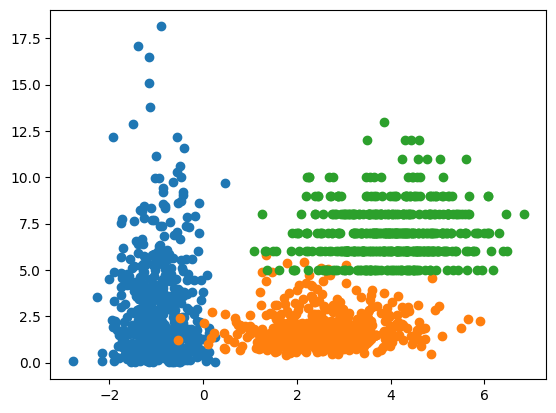

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X1_1, X2_1)
plt.scatter(X1_2, X2_2)
plt.scatter(X1_3, X2_3)

Create the dataset $X$ by concatenating $X_1$ and $X_2$ and the bias $X_0$. Do the same to create the labels $Y$

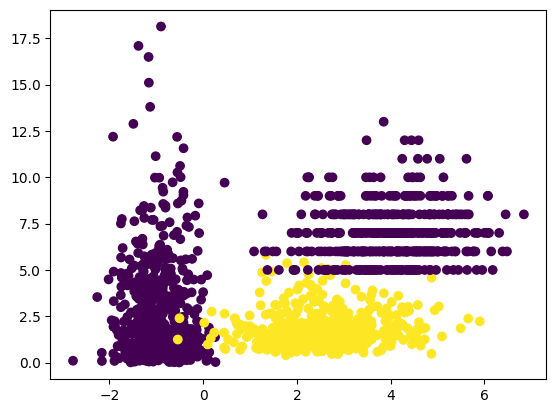

In [23]:
# bias
X0 = np.ones(3 * N)

X1 = np.concatenate((X1_1, X1_2, X1_3))
X2 = np.concatenate((X2_1, X2_2, X2_3))

X = np.stack((X0, X1, X2), axis=1)

y = np.concatenate((Y1, Y2, Y3))

# choose correct label
positive_class = 2
y_class = - np.ones_like(y)
y_class[ y == positive_class ] = 1

plt.scatter(X[:, 1], X[:, 2], c = y_class)

### Error function

Define the error function as the _Sum Squared Error_ which is: $\frac{1}{2}\sum_{i = 1}^N(\text{e}_i)^2$, where $e$ is the error vector

In [24]:
def sse(X:np.matrix, y:np.array, w:np.array) -> float:
    return np.sum( np.square( y - np.dot(X, w) ) ) / 2

## Train the perceptron with a mini-batch stochastic gradient descent

Set the values of the vector of parameters w with values drawn from a uniform distribution within the range \[-1. 1\].
Use a learning parameter eta equal to 1e-5 and a batch size of 10 objects. Set the maximum number of epochs to 100.
Save in the vector sse_epoch, the values of the sum of squares error for each epoch. Save in the vector errors_epoch, the number of objects misclassified at each epoch.
Remember to shuffle the dataset at each epoch.

In [25]:
w = np.random.uniform(low=-1, high=1, size=X.shape[1])

eta = 1e-5

batch_size = 10

max_epochs = 100
current_epoch = 0

sse_epoch = np.zeros(max_epochs)
error_epoch = np.zeros(max_epochs)


while current_epoch < max_epochs:

    sse_epoch[current_epoch] = sse(X, y_class, w)
    error_epoch[current_epoch] = np.sum( y_class * np.sign(np.dot(X, w)) < 0 )


    random_perm = np.random.permutation(range(y_class.size))
    X = X[random_perm, :]
    y_class = y_class[random_perm]

    for i in range(0, y_class.size, batch_size):

        X_batch = X[i : (i + batch_size), :]
        y_batch = y_class[i : (i + batch_size)]

        errors = y_batch - np.dot(X_batch, w)

        w += 2 * eta * np.dot( np.transpose(X_batch), errors ) / batch_size

    current_epoch += 1



Display raw the plots containing the solution found.

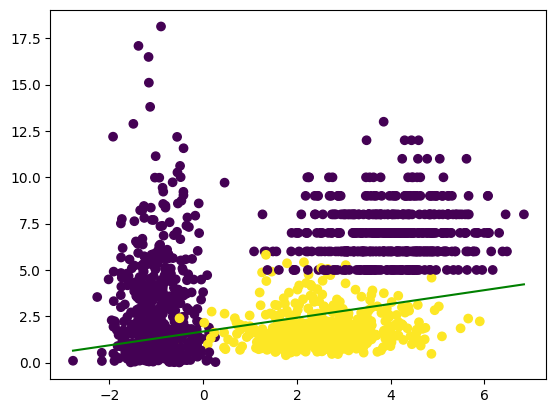

In [26]:
# plot the shuffled data
plt.scatter(X[:, 1], X[:, 2], c=y_class)

# plot solution
plt.plot([ np.min(X[:, 1]), np.max(X[:, 1]) ],
         [ - np.min(X[:, 1]) * w[1]/w[2] - w[0]/w[2], - np.max(X[:, 1]) * w[1]/w[2] - w[0]/w[2] ],
         color='green')

Display the two error plots using the two error vectors

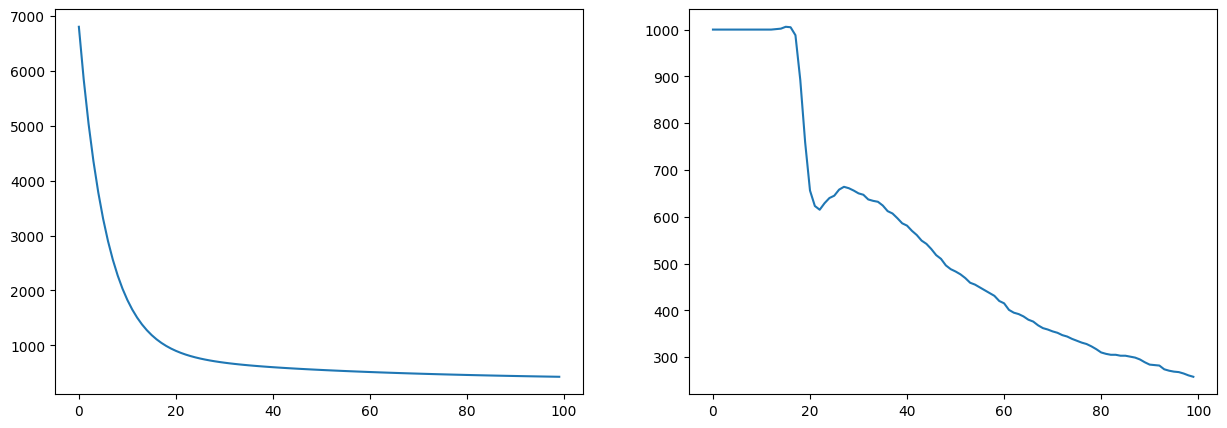

In [28]:
# subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# polt sum of squared errors per epoch
axs[0].plot(range(sse_epoch.size), sse_epoch)

# plot errors per epoch
axs[1].plot(range(error_epoch.size), error_epoch)